In [1]:
%matplotlib inline
import numpy as np

from scipy.stats import linregress
from scipy.stats import gmean
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import rubisco_data

import matplotlib.colors
import seaborn
import pandas as pd

In [2]:
# Load the data from Excel, remove data points that are not comparable.
# raw_kin_df is everything in the file, kin_df is the subset with all relevant kinetic data.
raw_kin_df, kin_df = rubisco_data.load_rubisco_data()

# Want to split data in various ways
# Savir vs. Non-Savir (mostly new) data
savir_pmid = '20142476'
savir_df = raw_kin_df[raw_kin_df.pmid_or_doi == savir_pmid]
nonsavir_df = raw_kin_df[raw_kin_df.pmid_or_doi != savir_pmid]

# Group by RuBisCO form
grouped_form = raw_kin_df.groupby('isoform')

# Markers we use for plotting below.
markers = 'o><^dsphH*'

cnames = ["windows blue", "amber", "greyish brown", "dusty purple", "dusty teal", "dusty red", ]
named_colors = seaborn.xkcd_palette(cnames)

In [3]:
print(raw_kin_df.shape[0], 'total WT RuBisCOs')
print(kin_df.shape[0], 'RuBisCOs with all core kinetic data measured')
print(raw_kin_df.short_ref.unique().size, 'references')

395 total WT RuBisCOs
207 RuBisCOs with all core kinetic data measured
55 references


In [4]:
taxa = ['Archaea', 'Alphaproteobacteria', 'Betaproteobacteria', 'Gammaproteobacteria', 
        'Cyanobacteria', 'Green algae', 'Chromophyte algae',  'Diatoms', 'Non-green algae',
        'C3 plants', 'C3-C4 plants', 'C4 plants', 'CAM plants' ]
sub_df = raw_kin_df[raw_kin_df.taxonomy.isin(taxa)]

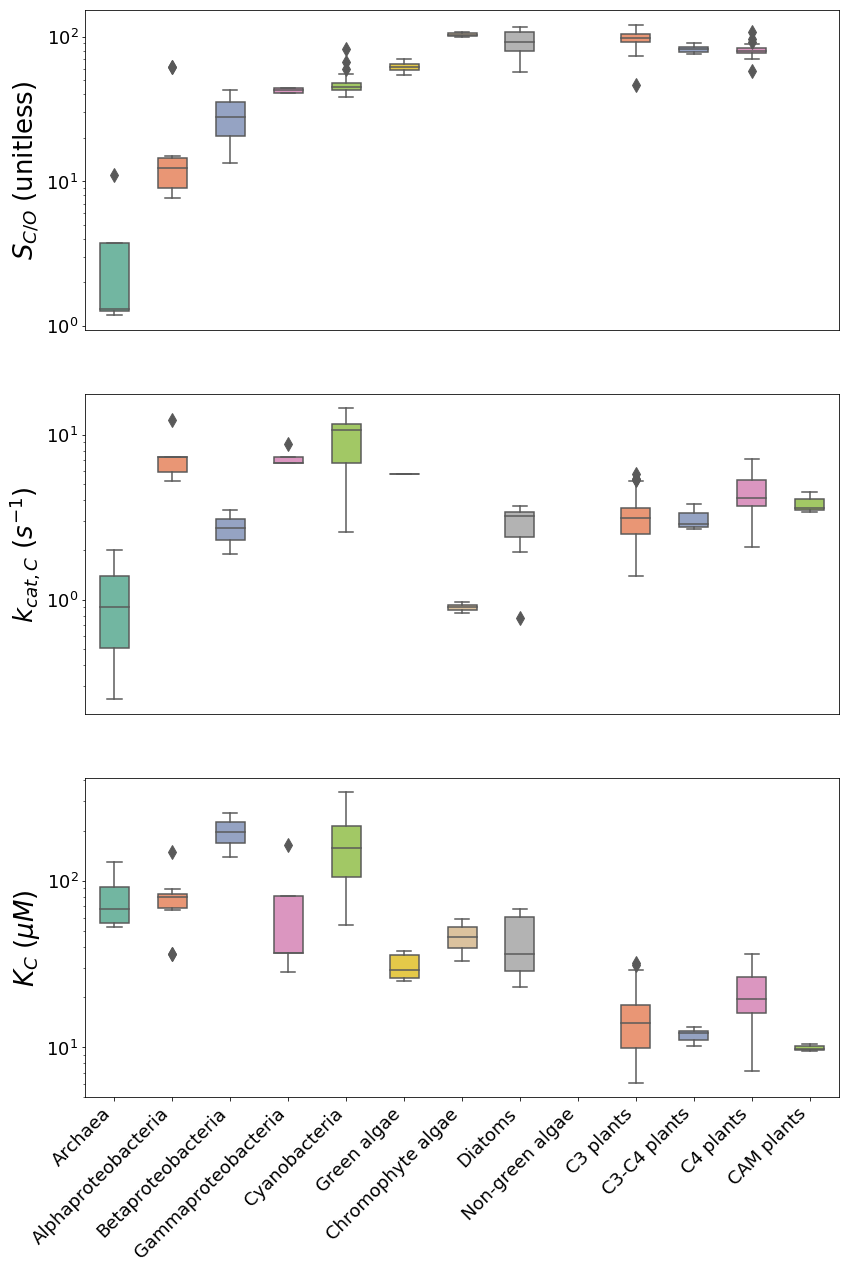

In [5]:
plt.figure(figsize=(13.5,20))

plt.subplot('311')
plt.yscale('log')
seaborn.boxplot(y='S', x='taxonomy', data=sub_df, order=taxa, width=0.5, palette='Set2', fliersize=10)
plt.xticks([])
plt.xlabel('')
plt.yticks(fontsize=18)
plt.ylabel('$S_{C/O}$ (unitless)', fontsize=26)

plt.subplot('312')
plt.yscale('log')
seaborn.boxplot(y='vC', x='taxonomy', data=sub_df, order=taxa, width=0.5, palette='Set2', fliersize=10)
plt.xticks([])
plt.xlabel('')
plt.yticks(fontsize=18)
plt.ylabel('$k_{cat,C}$ $(s^{-1})$', fontsize=26)

plt.subplot('313')
plt.yscale('log')
seaborn.boxplot(y='KC', x='taxonomy', data=sub_df, order=taxa, width=0.5, palette='Set2', fliersize=10)
plt.xticks(rotation=45, fontsize=18, ha='right')
plt.xlabel('')
plt.ylabel('$K_C$ $(\mu M)$', fontsize=26)
plt.yticks(fontsize=18)

plt.savefig('figS5/figS5_carboxylation_breakdown.png', dpi=300)
plt.show()

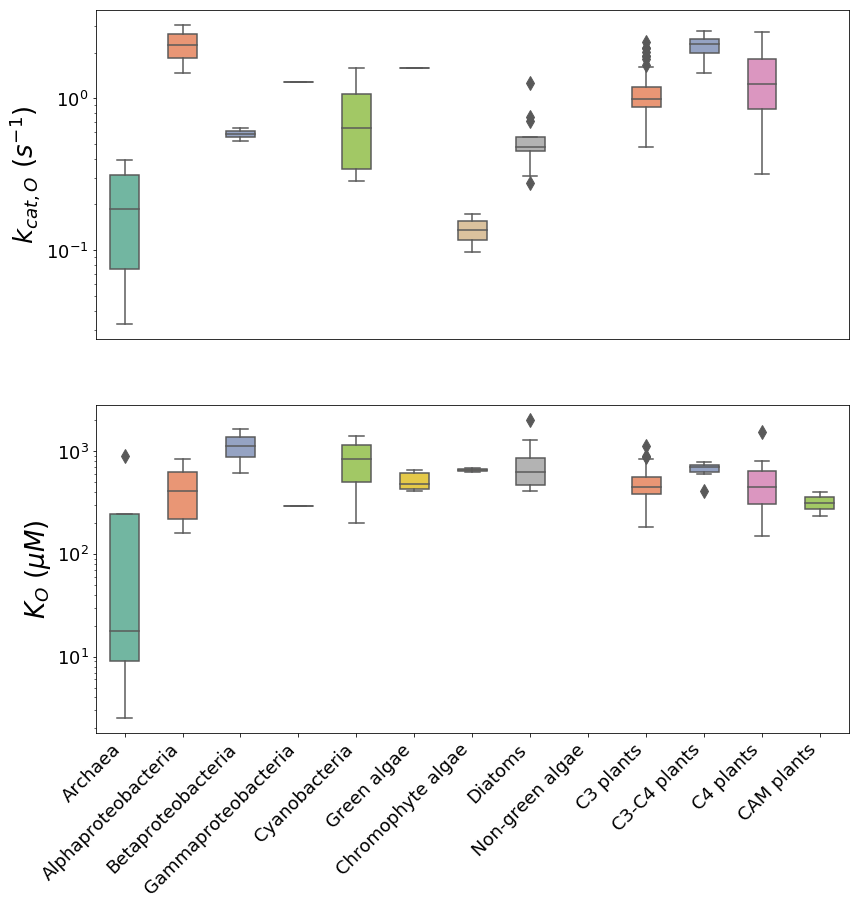

In [6]:
plt.figure(figsize=(13.5,13.3))

plt.subplot('211')
plt.yscale('log')
seaborn.boxplot(y='vO', x='taxonomy', data=sub_df, order=taxa, width=0.5, palette='Set2', fliersize=10)
plt.xticks([])
plt.xlabel('')
plt.yticks(fontsize=18)
plt.ylabel('$k_{cat,O}$ $(s^{-1})$', fontsize=26)

plt.subplot('212')
plt.yscale('log')
seaborn.boxplot(y='KO', x='taxonomy', data=sub_df, order=taxa, width=0.5, palette='Set2', fliersize=10)
plt.xticks(rotation=45, fontsize=18, ha='right')
plt.xlabel('')
plt.ylabel('$K_O$ $(\mu M)$', fontsize=26)
plt.yticks(fontsize=18)

plt.savefig('figS5/figS5_oxygenation_breakdown.png', dpi=300)
plt.show()

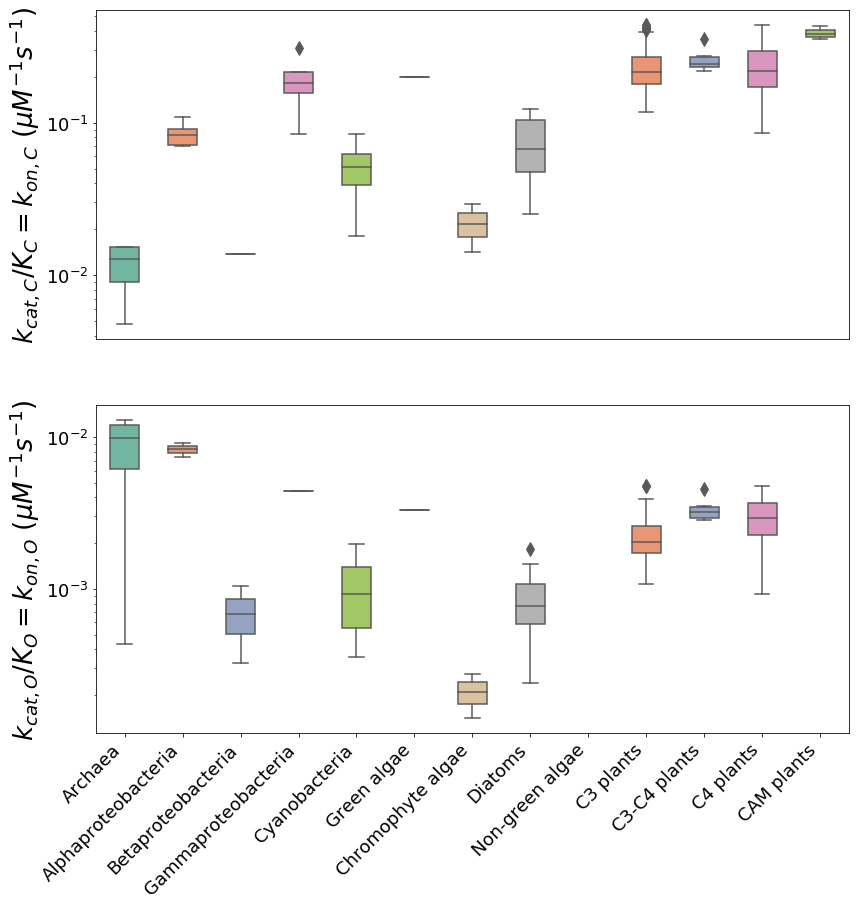

In [7]:
plt.figure(figsize=(13.5,13.3))

plt.subplot('211')
plt.yscale('log')
seaborn.boxplot(y='kon_C', x='taxonomy', data=sub_df, order=taxa, width=0.5, palette='Set2', fliersize=10)
plt.xticks([])
plt.xlabel('')
plt.yticks(fontsize=18)
plt.ylabel('$k_{cat,C} / K_C = k_{on,C}$ ($\mu M^{-1} s^{-1}$)', fontsize=26)

plt.subplot('212')
plt.yscale('log')
seaborn.boxplot(y='kon_O', x='taxonomy', data=sub_df, order=taxa, width=0.5, palette='Set2', fliersize=10)
plt.xticks(rotation=45, fontsize=18, ha='right')
plt.xlabel('')
plt.ylabel('$k_{cat,O} / K_O = k_{on,O}$ ($\mu M^{-1} s^{-1}$)', fontsize=26)
plt.yticks(fontsize=18)

plt.savefig('figS5/figS5_gas_rate_breakdown.png', dpi=300)
plt.show()

In [8]:
counts = raw_kin_df.groupby('taxonomy').count()
land_plants = ['Basal angiosperm', 'Bryophyte', 'C3 plants', 'C3-C4 plants', 'C4 plants', 'C4-like plants', 'CAM plants', 'Carnivorous plants', 'Fern', 'Gymnosperm', 'Haptophyte algae', 'Plant']

counts.loc[land_plants].sum()
counts.sum()


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


species                    395
identifier                 395
primary                    395
mutant                     395
heterologous_expression    395
KC                         337
KC_SD                      337
vC                         293
vC_SD                      293
S                          351
S_SD                       351
KO                         273
KO_SD                      273
vO                         207
vO_95CI_low                207
vO_95CI_high               207
vO_reported                 94
vO_SD_reported               5
kon_C                      286
kon_C_95CI_low             286
kon_C_95CI_high            286
kon_O                      207
kon_O_95CI_low             207
kon_O_95CI_high            207
KRuBP                       64
KRuBP_SD                    64
temp_C                     395
pH                         353
isoform                    395
note                       303
short_ref                  395
pmid_or_doi                387
citation

In [9]:
raw_kin_df.pmid_or_doi.unique().size

76

In [10]:
raw_kin_df.species.unique().size

303